In [11]:
print(__doc__)
# 本案例是使用带有RBF核的非线性SVC执行二分类任务。预测目标是输入的XOR数据。颜色图说明了SVC学习的决策功能。

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

Automatically created module for IPython interactive environment


In [12]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)

X = np.random.randn(100, 2)
# Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
Y = np.logical_and(X[:, 0] > 0, X[:, 1] > 0)

In [13]:
#（译者注：可以在这里通过显示Y来查看什么是XOR数据）
print(Y[:5, ])
print(X[:5, ])

[ True  True False False False]
[[ 1.76405235  0.40015721]
 [ 0.97873798  2.2408932 ]
 [ 1.86755799 -0.97727788]
 [ 0.95008842 -0.15135721]
 [-0.10321885  0.4105985 ]]


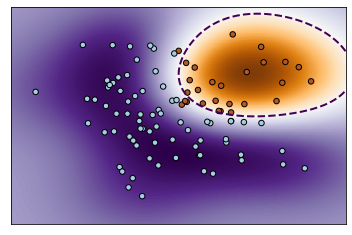

In [14]:
# 拟合模型
clf = svm.NuSVC(gamma='auto')
clf.fit(X, Y)

# 在网格上为每个数据点绘制决策函数
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
            edgecolors='k')
plt.xticks(())
plt.yticks(())
plt.axis([-3, 3, -3, 3])
plt.show()